 # About dataset
 Dataset asuransi kesehatan berisi informasi tentang sejumlah faktor yang dapat memengaruhi biaya medis, termasuk usia, jenis kelamin, IMT, status merokok, jumlah anak, dan wilayah. Dataset ini dapat digunakan untuk melatih model pembelajaran mesin yang dapat memprediksi biaya medis untuk pelanggan baru.

Untuk memberikan wawasan mengenai faktor-faktor utama yang menyebabkan biaya asuransi lebih tinggi dan membantu perusahaan membuat keputusan yang lebih tepat mengenai penetapan harga dan penilaian risiko.

- Age: Usia
- Sex : Jenis kelamin
- BMI (Body Mass Index)
- Children : Jumlah anak
- Smoker : Apakah pasien merokok? (yes/no)
- region: Wilayah
- Charges: Biaya

Pernyataan Masalah:

- Apa faktor terpenting yang memengaruhi biaya pengobatan?
- Seberapa baik model pembelajaran mesin dapat memprediksi biaya medis?
- Bagaimana model pembelajaran mesin dapat digunakan untuk meningkatkan efisiensi dan profitabilitas perusahaan asuransi kesehatan?

In [161]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [162]:
# api = KaggleApi()
# api.authenticate()

# data_name = 'harishkumardatalab/medical-insurance-price-prediction'
# api.dataset_download_files(data_name, path='./data', unzip=True)

In [163]:
insurance = pd.read_csv('./data/Medical_insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [164]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
data_train = pd.concat([xtrain, ytrain], axis=1)
data_test = pd.concat([xtest, ytest], axis=1)
data_train

,age,sex,bmi,children,smoker,region,charges
1864,21,male,36.850,0,no,southeast,1534.30450
1997,38,female,34.800,2,no,southwest,6571.54400
1336,21,female,25.800,0,no,southwest,2007.94500
655,52,female,25.300,2,yes,southeast,24667.41900
261,20,female,26.840,1,yes,southeast,17085.26760
...,...,...,...,...,...,...,...
1638,54,male,34.210,2,yes,southeast,44260.74990
1095,18,female,31.350,4,no,northeast,4561.18850
1130,39,female,23.870,5,no,southeast,8582.30230
1294,58,male,25.175,0,no,northeast,11931.12525


In [166]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2217 entries, 1864 to 860
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2217 non-null   int64  
 1   sex       2217 non-null   object 
 2   bmi       2217 non-null   float64
 3   children  2217 non-null   int64  
 4   smoker    2217 non-null   object 
 5   region    2217 non-null   object 
 6   charges   2217 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 138.6+ KB


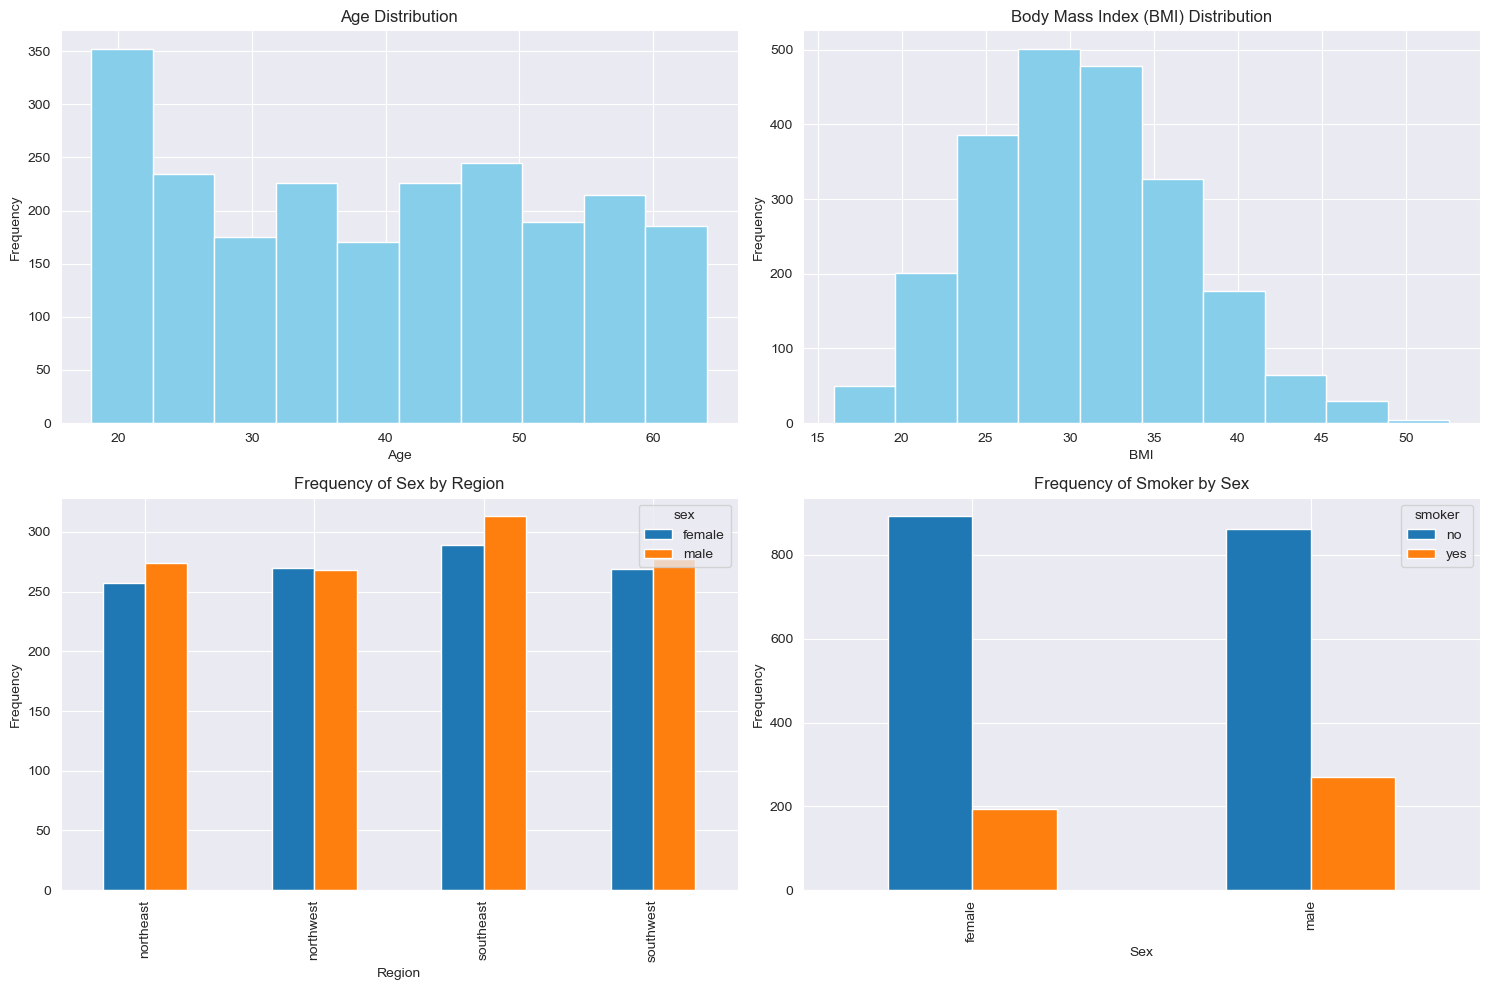

In [167]:
groupby_region = data_train.groupby('region')['sex'].value_counts().unstack()
groupby_sex = data_train.groupby('sex')['smoker'].value_counts().unstack()
# groupby_regionC = data_train.groupby('region')['children'].count()


fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].hist(data_train['age'], bins=10, color='skyblue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('Age')

axs[0, 1].hist(data_train['bmi'], bins=10, color='skyblue')
axs[0, 1].set_title('Body Mass Index (BMI) Distribution')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlabel('BMI')

groupby_region.plot(kind='bar',ax=axs[1, 0])
axs[1, 0].set_title('Frequency of Sex by Region')
axs[1, 0].set_xlabel('Region')
axs[1, 0].set_ylabel('Frequency')

groupby_sex.plot(kind='bar',ax=axs[1, 1])
axs[1, 1].set_title('Frequency of Smoker by Sex')
axs[1, 1].set_xlabel('Sex')
axs[1, 1].set_ylabel('Frequency')

# groupby_regionC.plot(kind='bar',ax=axs[1, 2])
# axs[1, 2].set_title('Frequency of Smoker by Children')
# axs[1, 2].set_xlabel('Sex')
# axs[1, 2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

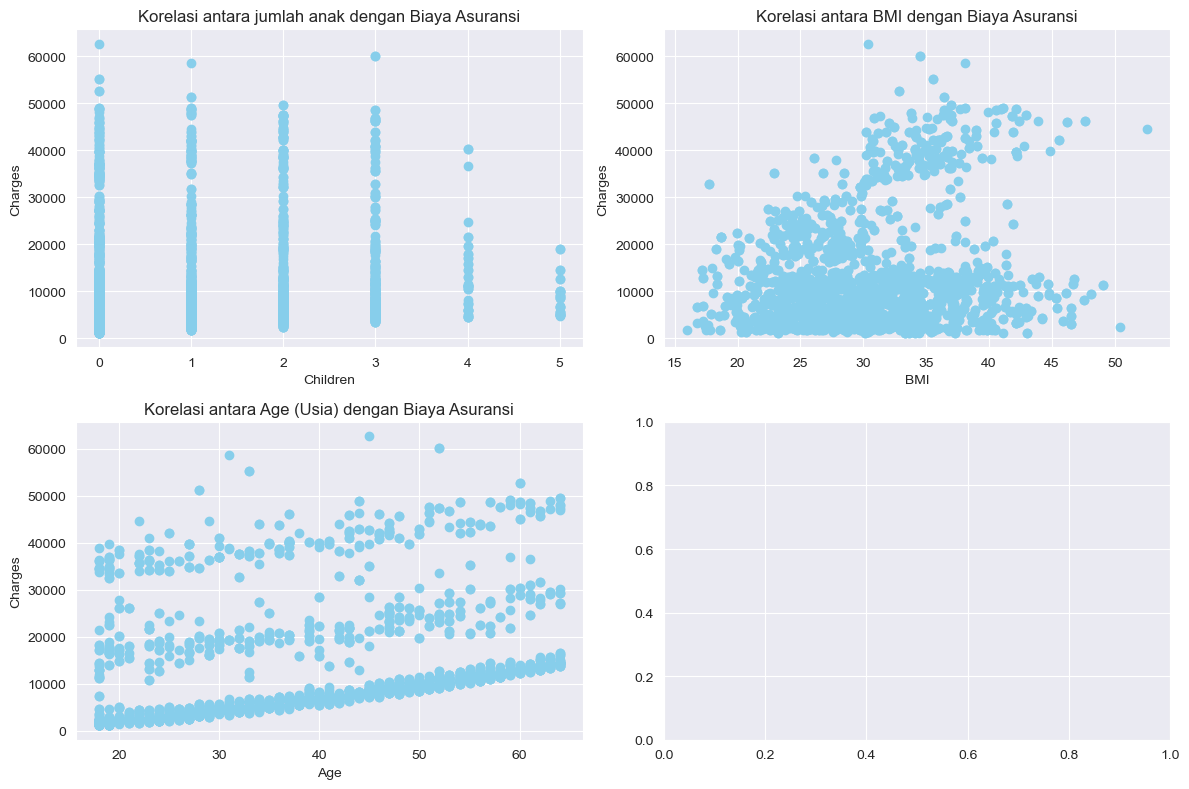

In [168]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(x=data_train['children'], y=data_train['charges'], color='skyblue')
axs[0, 0].set_title('Korelasi antara jumlah anak dengan Biaya Asuransi')
axs[0, 0].set_ylabel('Charges')
axs[0, 0].set_xlabel('Children')

axs[0, 1].scatter(x=data_train['bmi'], y=data_train['charges'], color='skyblue')
axs[0, 1].set_title('Korelasi antara BMI dengan Biaya Asuransi')
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Charges')

axs[1, 0].scatter(x=data_train['age'], y=data_train['charges'], color='skyblue')
axs[1, 0].set_title('Korelasi antara Age (Usia) dengan Biaya Asuransi')
axs[1, 0].set_ylabel('Charges')
axs[1, 0].set_xlabel('Age')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'data train correlation matrix')

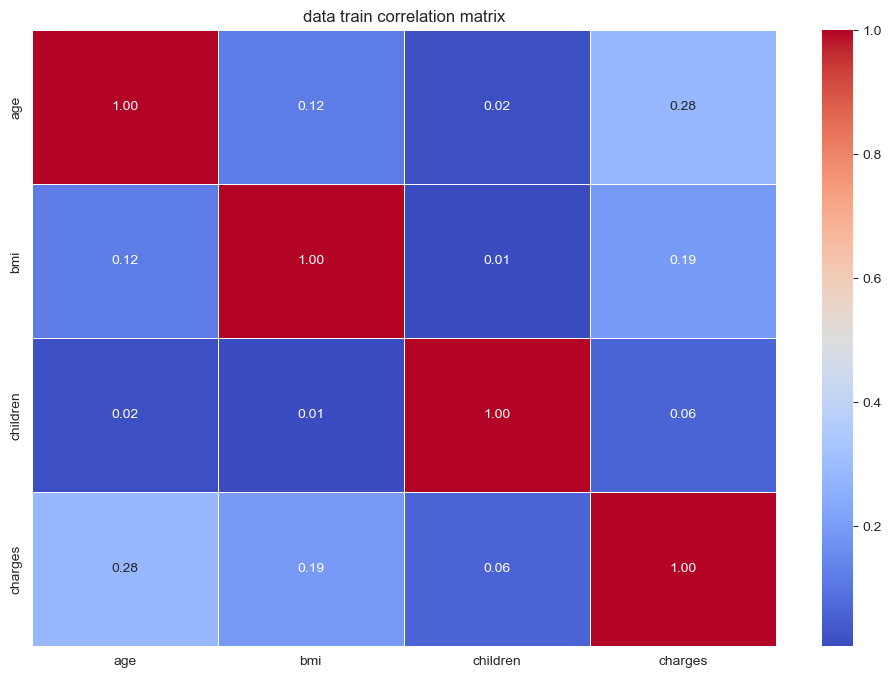

In [169]:
num_cols = data_train.select_dtypes(exclude='object').columns.tolist()
train_corr = data_train[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(train_corr, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm')
plt.title('data train correlation matrix')

# Feature Engineering (data training)

In [170]:
def cat_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Healthy weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
    
data_train['bmi_category'] = data_train['bmi'].apply(cat_bmi)

In [171]:
data_train[['bmi', 'bmi_category']]

,bmi,bmi_category
1864,36.850,Obesity
1997,34.800,Obesity
1336,25.800,Overweight
655,25.300,Overweight
261,26.840,Overweight
...,...,...
1638,34.210,Obesity
1095,31.350,Obesity
1130,23.870,Healthy weight
1294,25.175,Overweight


In [172]:
def create_risk_levels(df):
    df = df.copy()
    
    # Risk level 0-3
    conditions = [
        (df['smoker'] == 'yes') & (df['bmi'] > 30),  # Level 3: Sangat tinggi
        (df['smoker'] == 'yes') & (df['bmi'] <= 30), # Level 2: Tinggi
        (df['smoker'] == 'no') & (df['bmi'] > 30),  # Level 1: Sedang
        (df['smoker'] == 'no') & (df['bmi'] <= 30)  # Level 0: Rendah
    ]
    
    levels = [3, 2, 1, 0]
    
    df['risk_level'] = np.select(conditions, levels, default=0)
    
    return df

data_train = create_risk_levels(data_train)

In [173]:
xtrain

,age,sex,bmi,children,smoker,region
1864,21,male,36.850,0,no,southeast
1997,38,female,34.800,2,no,southwest
1336,21,female,25.800,0,no,southwest
655,52,female,25.300,2,yes,southeast
261,20,female,26.840,1,yes,southeast
...,...,...,...,...,...,...
1638,54,male,34.210,2,yes,southeast
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast


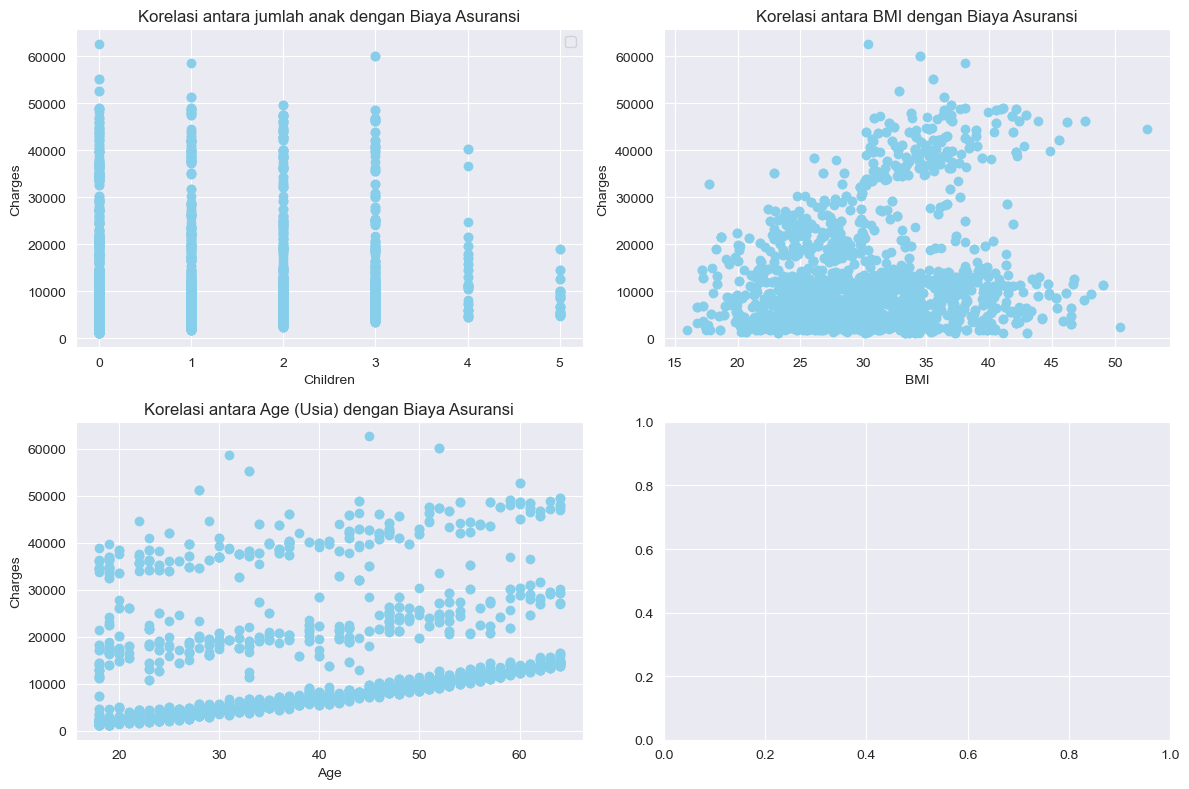

In [174]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(x=data_train['children'], y=data_train['charges'], color='skyblue')
axs[0, 0].legend()
axs[0, 0].set_title('Korelasi antara jumlah anak dengan Biaya Asuransi')
axs[0, 0].set_ylabel('Charges')
axs[0, 0].set_xlabel('Children')

axs[0, 1].scatter(x=data_train['bmi'], y=data_train['charges'], color='skyblue')
axs[0, 1].set_title('Korelasi antara BMI dengan Biaya Asuransi')
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Charges')

axs[1, 0].scatter(x=data_train['age'], y=data_train['charges'], color='skyblue')
axs[1, 0].set_title('Korelasi antara Age (Usia) dengan Biaya Asuransi')
axs[1, 0].set_ylabel('Charges')
axs[1, 0].set_xlabel('Age')


plt.tight_layout()
plt.show()

# Preprocessing

In [175]:
data_train['smoker'] = data_train['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [176]:
data_train.isna().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
risk_level      0
dtype: int64

In [177]:
data_train.duplicated().sum()

935

In [178]:
data_train.drop_duplicates(inplace=True)

In [179]:
data_train.shape

(1282, 9)

In [180]:
data_train

,age,sex,bmi,children,smoker,region,charges,bmi_category,risk_level
1864,21,male,36.850,0,0,southeast,1534.30450,Obesity,1
1997,38,female,34.800,2,0,southwest,6571.54400,Obesity,1
1336,21,female,25.800,0,0,southwest,2007.94500,Overweight,0
655,52,female,25.300,2,1,southeast,24667.41900,Overweight,2
261,20,female,26.840,1,1,southeast,17085.26760,Overweight,2
...,...,...,...,...,...,...,...,...,...
2391,29,male,31.730,2,0,northwest,4433.38770,Obesity,1
769,38,female,19.475,2,0,northwest,6933.24225,Healthy weight,0
1482,54,female,30.800,3,0,southwest,12105.32000,Obesity,1
2169,50,female,27.600,1,1,southwest,24520.26400,Overweight,2


# FE for data test

In [181]:
data_test['bmi_category'] = data_test['bmi'].apply(cat_bmi)
data_test = create_risk_levels(data_test)
data_test['smoker'] = data_test['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data_test

,age,sex,bmi,children,smoker,region,charges,bmi_category,risk_level
1106,49,female,29.925,0,0,northwest,8988.15875,Obesity,0
1321,62,male,26.695,0,1,northeast,28101.33305,Overweight,2
2313,57,female,20.100,1,0,southwest,12032.32600,Healthy weight,0
2274,22,male,39.500,0,0,southwest,1682.59700,Obesity,1
1432,18,female,38.665,2,0,northeast,3393.35635,Obesity,1
...,...,...,...,...,...,...,...,...,...
930,26,male,46.530,1,0,southeast,2927.06470,Obesity,1
2610,41,male,23.940,1,0,northeast,6858.47960,Healthy weight,0
1700,27,female,31.400,0,1,southwest,34838.87300,Obesity,3
100,41,female,31.600,0,0,southwest,6186.12700,Obesity,1


In [182]:
cat_cols = data_train.select_dtypes(include='object').columns.tolist()
num_cols = data_train.select_dtypes(exclude=['object']).columns.tolist()
num_cols.remove('smoker')
num_cols.remove('charges')
print(cat_cols)
print(num_cols)

['sex', 'region', 'bmi_category']
['age', 'bmi', 'children', 'risk_level']


In [183]:
xtrain = data_train.drop('charges', axis=1)
ytrain = data_train['charges']
print(xtrain.shape)
print(ytrain.shape)


xtest = data_test.drop('charges', axis=1)
ytest = data_test['charges']

print(xtest.shape)
print(ytest.shape)

(1282, 8)
(1282,)
(555, 8)
(555,)


In [184]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [185]:
regressor = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [186]:
from sklearn.compose import ColumnTransformer
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler1 = MinMaxScaler()

preprocessor1 = ColumnTransformer(
    transformers=[
        ('cat', encoder1, cat_cols),
        ('num', scaler1, num_cols)
    ],
    remainder='passthrough'
)

xtrain_processed = preprocessor1.fit_transform(xtrain) 
xtest_processed = preprocessor1.transform(xtest)

feature_names = preprocessor1.get_feature_names_out()
xtrain_processed_df = pd.DataFrame(xtrain_processed, columns=feature_names, index=xtrain.index)
xtest_processed_df = pd.DataFrame(xtest_processed, columns=feature_names, index=xtest.index)

<Axes: >

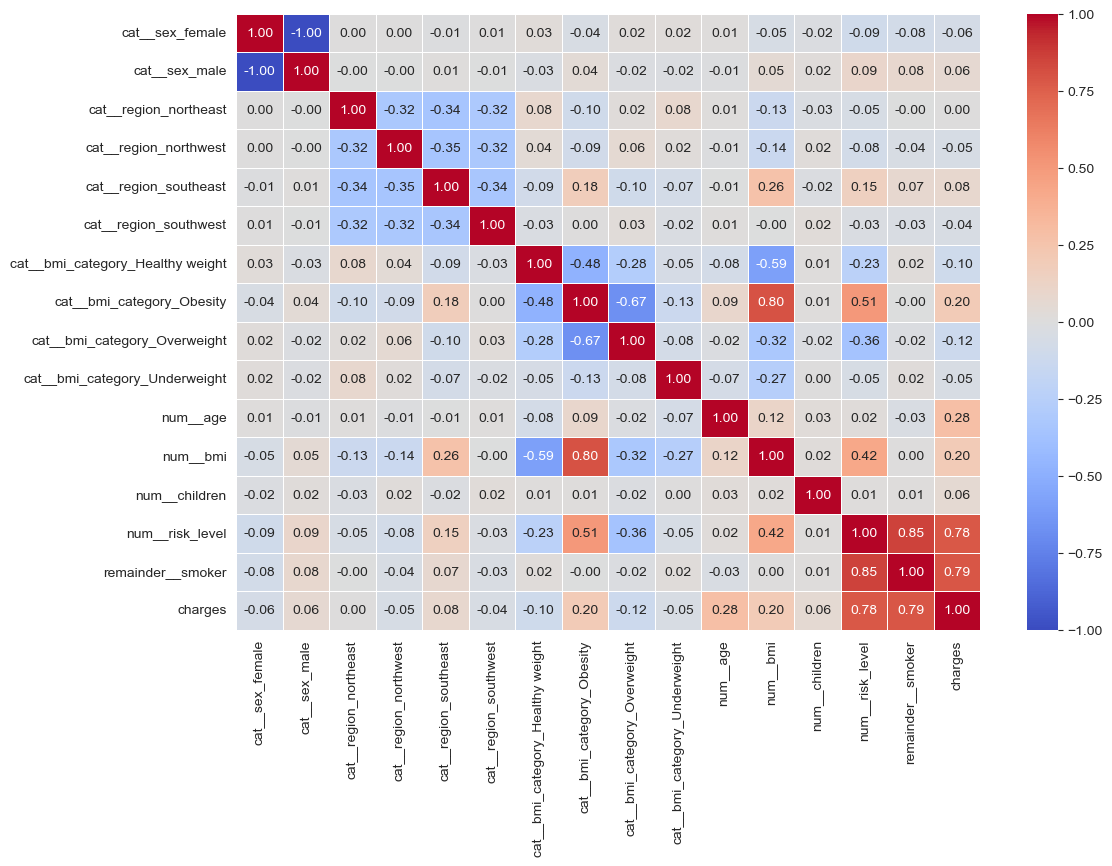

In [187]:
train_processed_corr = pd.concat([xtrain_processed_df, ytrain], axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(train_processed_corr, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm')

In [189]:
from sklearn.utils import resample
from sklearn.base import clone

# bias variance untuk regression
def bias_variance_regression(model, x, y, n_bootstrap=50):
    n_samples = x.shape[0]
    y_arr = np.asarray(y).ravel()

    preds = np.zeros((n_samples, n_bootstrap), dtype=float)

    for i in range(n_bootstrap):
        x_resample, y_resample = resample(x, y_arr, replace=True, n_samples=n_samples)

        model_clone = clone(model)
        try:
            model_clone.fit(x_resample, y_resample)
        except Exception:
            # fallback: fit pada data penuh jika bootstrap bermasalah
            model_clone = clone(model)
            model_clone.fit(x, y_arr)

        preds[:, i] = model_clone.predict(x)

    # Mean prediction across bootstraps
    y_pred_mean = preds.mean(axis=1)

    # Bias^2: squared difference between mean prediction and true target
    bias2 = np.mean((y_arr - y_pred_mean) ** 2)
    
    # Variance: average variance of predictions across bootstraps
    variance = np.mean(preds.var(axis=1))

    return bias2, variance

from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results_list = []
fitted_models = {}

for name, model in regressor.items():
    pipe = Pipeline([
        ('preprocess', preprocessor1),
        ('model', model)
    ])

    pipe.fit(xtrain, ytrain)
    fitted_models[name] = pipe

    y_train_pred = pipe.predict(xtrain)
    train_mse = mean_squared_error(ytrain, y_train_pred)
    train_r2 = r2_score(ytrain, y_train_pred)

    train_bias2, train_var = bias_variance_regression(pipe, xtrain, ytrain)

    print(f"Model: {name}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train Bias²: {train_bias2:.4f}")
    print(f"Train Variance: {train_var:.4f}")
    print("-"*50)

    cv_scores = cross_val_score(pipe, xtrain, ytrain, cv=kf, scoring='r2', n_jobs=-1)

    row = {'Model': name}
    for i in range(len(cv_scores)):
        row[f"CV_Fold_{i+1}"] = cv_scores[i]
    row['Mean_R2'] = cv_scores.mean()
    row['Std_R2'] = cv_scores.std()
    results_list.append(row)

cv_results_df = pd.DataFrame(results_list).sort_values('Mean_R2', ascending=False).reset_index(drop=True)
cv_results_df

Model: Linear Regression
Train MSE: 35638966.4719
Train R²: 0.7557
Train Bias²: 35640968.5132
Train Variance: 401222.2161
--------------------------------------------------
Model: K-Nearest Neighbors
Train MSE: 16798517.9707
Train R²: 0.8848
Train Bias²: 15962685.8459
Train Variance: 4994798.7027
--------------------------------------------------
Model: Decision Tree
Train MSE: 60951.8000
Train R²: 0.9996
Train Bias²: 3500347.9051
Train Variance: 12648194.0689
--------------------------------------------------
Model: Support Vector Regressor
Train MSE: 160998564.4158
Train R²: -0.1038
Train Bias²: 161433863.4872
Train Variance: 88803.4728
--------------------------------------------------
Model: Random Forest
Train MSE: 3454720.1150
Train R²: 0.9763
Train Bias²: 6456464.0649
Train Variance: 4402186.2396
--------------------------------------------------
Model: ElasticNet
Train MSE: 87180429.7379
Train R²: 0.4023
Train Bias²: 87406742.8347
Train Variance: 156595.7434
-------------------

,Model,CV_Fold_1,CV_Fold_2,CV_Fold_3,CV_Fold_4,CV_Fold_5,Mean_R2,Std_R2
0,GradientBoostingRegressor,0.863889,0.856720,0.832336,0.864700,0.850723,0.853673,0.011826
1,Random Forest,0.844567,0.843008,0.801992,0.851744,0.823363,0.832935,0.018109
2,K-Nearest Neighbors,0.834127,0.807368,0.815751,0.826988,0.801676,0.817182,0.012018
3,Ridge,0.759515,0.751087,0.727511,0.762793,0.738346,0.747850,0.013220
4,Lasso,0.758769,0.751310,0.727143,0.763195,0.736521,0.747387,0.013585
5,Linear Regression,0.758053,0.746932,0.726881,0.764919,0.735704,0.746498,0.013960
6,Decision Tree,0.664470,0.730572,0.674672,0.781219,0.570145,0.684216,0.070784
7,ElasticNet,0.411030,0.395164,0.392804,0.366373,0.413912,0.395857,0.016943
8,Support Vector Regressor,-0.099852,-0.069651,-0.110481,-0.168307,-0.078224,-0.105303,0.034729


In [190]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, cat_cols),
        ('num', scaler, num_cols)
    ],
    remainder='passthrough'
)

# Pipeline lengkap: preprocessing + polynomial (optional) + estimator
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('poly', 'passthrough'),  # Default passthrough, bisa di-override di param
    ('model', KNeighborsRegressor())
])

param_distributions = [
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [2, 3],
        'poly__interaction_only': [False, True],
        'model': [Ridge()],
        'model__alpha': [0.1, 1.0, 10.0, 100.0]
    },
    
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [2],
        'poly__interaction_only': [False],
        'model': [Lasso()],
        'model__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [2],
        'poly__interaction_only': [False, True],
        'model': [LinearRegression()]
    },
    
    {
        'poly': ['passthrough'],
        'model': [KNeighborsRegressor()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    
    {
        'poly': ['passthrough'],
        'model': [RandomForestRegressor(random_state=42)],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [10, 15, 20, None],
        'model__min_samples_split': [2, 5, 10]
    },
    
    {
        'poly': ['passthrough'],
        'model': [GradientBoostingRegressor(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1, 0.15],
        'model__max_depth': [3, 5, 7]
    },
    
    {
        'poly': ['passthrough'],
        'model': [SVR()],
        'model__kernel': ['rbf', 'poly'],
        'model__C': [0.1, 1.0, 10.0],
        'model__epsilon': [0.1, 0.2]
    }
]

rscv = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=50, 
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rscv.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['sex',
                                                                                'region',
                                                                                'bmi_category']),
                                                                              ('num',
                                                                               MinMaxScaler(),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children',
                                                                                'risk_level'])])),
                                             ('poly', 'passthrough'),
                                             ('model', KNeighborsRegressor())]),
                   n_iter=50,...
                                        {'model': [GradientBoostingRegressor(random_state=42)],
                                         'model__learning_rate': [0.05, 0.1,
                                                                  0.15],
                                         'model__max_depth': [3, 5, 7],
                                         'model__n_estimators': [100, 200],
                                         'poly': ['passthrough']},
                                        {'model': [SVR()],
                                         'model__C': [0.1, 1.0, 10.0],
                                         'model__epsilon': [0.1, 0.2],
                                         'model__kernel': ['rbf', 'poly'],
                                         'poly': ['passthrough']}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [191]:
ypred = rscv.predict(xtest)

In [192]:
mae_model = mean_absolute_error(ytest, ypred)
mse_model = mean_squared_error(ytest, ypred)
rmse_model = root_mean_squared_error(ytest, ypred)
r2_model = r2_score(ytest, ypred)

metrics_eval = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Value': [mae_model, mse_model, rmse_model, r2_model]
})
metrics_eval

,Metric,Value
0,MAE,2.500384e+03
1,MSE,2.246115e+07
2,RMSE,4.739319e+03
3,R²,8.536552e-01


In [193]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [194]:
import joblib

joblib.dump(rscv.best_estimator_, './models/best_model.pkl')

['./models/best_model.pkl']